# Exercício

**Obs.1:** Um bom resultado de otimização do problema é quando não existem trechos cruzados.

**Obs.2:** Utilize número de pontos >= 50.

In [56]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import numpy as np
import math

import matplotlib.pyplot as plt

from tqdm import tqdm
import pandas as pd


def avalia_percurso_com_restricao(individuo):
    # dado um indivíduo, cria um percurso e calcula a distância euclideana deste percurso
    return (distancia_total(cria_percurso(individuo)),)

def avalia_percurso(individuo):
    # dado um indivíduo, cria um percurso e calcula a distância euclideana deste percurso
    return (distancia_total(cria_percurso(individuo)),)

def distancia_total(percurso):
    return sum(distancia(percurso[i], percurso[i-1]) 
               for i in range(len(percurso)))

def cria_percurso(individuo):
    # dado um indivíduo, cria um percurso 
    return [list(coordenadas)[e] for e in individuo]

def distancia(c1,c2):
    # distância euclideana entre dois pontos no espaço complexo (coordenadas dos municípios)
    return abs(c1-c2)

def main_func(N_, n_pop, n_generations, numPontos, cx_prob=0.5, mutate_prob=0.5):
    # CREATOR
    creator.create("FitnessTSP", base.Fitness, weights=(-1.0,))
    creator.create("Individuo", list, fitness=creator.FitnessTSP)

    # TOOLBOX
    toolbox = base.Toolbox()
    toolbox.register("indices", np.random.permutation, N_)
    toolbox.register("individuo", tools.initIterate, creator.Individuo,toolbox.indices)
    toolbox.register("populacao", tools.initRepeat, list, toolbox.individuo)

    # Operador de crossover
    toolbox.register("mate", tools.cxOrdered)

    # Operador de mutacao
    toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.02)

    # Funcao objetivo
    toolbox.register("evaluate", avalia_percurso)

    # Operador de selecao
    toolbox.register("select", tools.selTournament, tournsize=numPontos)

    # Solucao
    pop = toolbox.populacao(n=n_pop)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)

    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    pop, log = algorithms.eaSimple(pop,\
                                       toolbox,\
                                       cxpb=cx_prob, \
                                       mutpb=mutate_prob, \
                                       ngen=n_generations,\
                                       stats=stats,\
                                       halloffame=hof,\
                                       verbose=False)
    
    return pop, log

**(a)(4pts)** O resultado da otimização depende do tamanho do problema (número de pontos) e da população. Faça experimentos variando-os, plote os resultados obtidos e comente. 

In [46]:
# Inputs
Ponto = complex

N_ = 50
x_sel = 2*(np.random.random_sample(N_)-0.5)
y_sel = 2*(np.random.random_sample(N_)-0.5)
coordenadas = [Ponto(x_sel[i],y_sel[i]) for i in range(N_)]
numPontos = len(coordenadas)

n_pop = 500
n_generations = 500

# Variando o numero de pontos
dict_log_min = {}
dict_log_avg = {}
for n in tqdm(range(100, 1000, 100)):    
    x_sel = 2*(np.random.random_sample(n)-0.5)
    y_sel = 2*(np.random.random_sample(n)-0.5)
    coordenadas = [Ponto(x_sel[i],y_sel[i]) for i in range(n)]
    numPontos = len(coordenadas)

    pop_loop, log_loop = main_func(n, n_pop, n_generations, numPontos)
    dict_log_min[str(n)] = log_loop.select('min')
    dict_log_avg[str(n)] = log_loop.select('avg')

log_avg_df = pd.DataFrame.from_dict(dict_log_avg)
log_min_df = pd.DataFrame.from_dict(dict_log_min)





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]



 11%|█████████▎                                                                          | 1/9 [01:17<10:23, 77.97s/it]



 22%|██████████████████▍                                                                | 2/9 [03:50<11:42, 100.40s/it]



 33%|███████████████████████████▋                                                       | 3/9 [07:57<14:25, 144.21s/it]



 44%|████████████████████████████████████▉                                              | 4/9 [13:38<16:56, 203.38s/it]



 56%|██████████████████████████████████████████████                                     | 5/9 [20:57<18:16, 274.05s/it]



 67%|███████████████████████████████████████████████████████▎                           | 6/9 [29:54<17:38, 352.89s/it]



 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [41:18<15:04, 452.22s/it]



 89%|███████

Text(0, 0.5, 'Média da série do fitness avg/min no tempo')

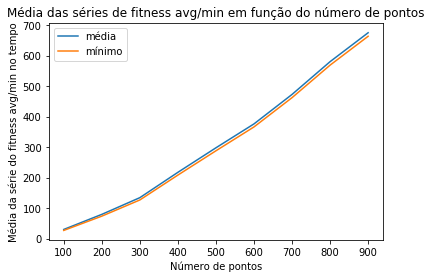

In [47]:
log_avg_df = pd.DataFrame.from_dict(dict_log_avg)
mean_log_avg_df = log_avg_df.mean()
mean_log_avg_df.index = list(log_avg_df.columns)

fig, ax = plt.subplots()
log_avg_df.mean().plot(kind='line', ax=ax)
log_min_df.mean().plot(kind='line', ax=ax)
ax.legend(["média", "mínimo"]);
plt.title('Média das séries de fitness avg/min em função do número de pontos')
plt.xlabel("Número de pontos")
plt.ylabel("Média da série do fitness avg/min")

In [42]:
N_ = 50
x_sel = 2*(np.random.random_sample(N_)-0.5)
y_sel = 2*(np.random.random_sample(N_)-0.5)
coordenadas = [Ponto(x_sel[i],y_sel[i]) for i in range(N_)]
numPontos = len(coordenadas)
n_pop = 500
n_generations = 500

# Variando o numero de pontos
dict_log_min = {}
dict_log_avg = {}
for n in tqdm(range(100, 1000, 100)):    
    pop_loop, log_loop = main_func(N_, n, n_generations, numPontos)
    dict_log_min[str(n)] = (log_loop.select('min')) 
    dict_log_avg[str(n)] = (log_loop.select('avg')) 
log_avg_df = pd.DataFrame.from_dict(dict_log_avg)
log_min_df = pd.DataFrame.from_dict(dict_log_min)





  0%|                                                                                            | 0/9 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessTSP' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)




 11%|█████████▎                                                                          | 1/9 [00:07<01:01,  7.65s/it]



 22%|██████████████████▋                                                                 | 2/9 [00:23<01:10, 10.01s/it]



 33%|████████████████████████████                                                        | 3/9 [00:47<01:25, 14.19s/it]



 44%|████████████████

Text(0, 0.5, 'Média da série do fitness avg/mmin no tempo')

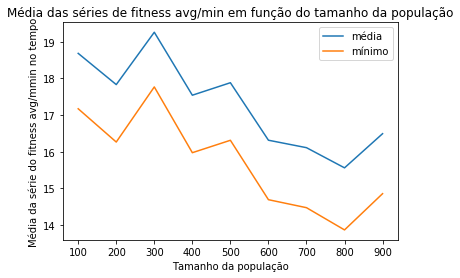

In [44]:
log_avg_df = pd.DataFrame.from_dict(dict_log_avg)
mean_log_avg_df = log_avg_df.mean()
mean_log_avg_df.index = list(log_avg_df.columns)

fig, ax = plt.subplots()
log_avg_df.mean().plot(kind='line', ax=ax)
log_min_df.mean().plot(kind='line', ax=ax)
ax.legend(["média", "mínimo"]);
plt.title('Média das séries de fitness avg/min em função do tamanho da população')
plt.xlabel("Tamanho da população")
plt.ylabel("Média da série do fitness avg/min")


**(b)(3pts)** Pegue o melhor resultado do item (a), que deve estar de acordo com a **Obs.1** e fixe os dois tamanhos. Faça experimentos variando as probabilidades de crossover e mutação no problema, plote os resultados obtidos e comente. 

In [64]:
N_ = 100
n_pop = 800
x_sel = 2*(np.random.random_sample(N_)-0.5)
y_sel = 2*(np.random.random_sample(N_)-0.5)
coordenadas = [Ponto(x_sel[i],y_sel[i]) for i in range(N_)]
numPontos = len(coordenadas)
n_generations = 500

# Variando a prob de mutação
dict_log_min = {}
dict_log_avg = {}
for prob in tqdm(np.arange(0.1, 0.9, 0.1)):    
    pop_loop, log_loop = main_func(N_, n, n_generations, numPontos, mutate_prob=prob)
    dict_log_min[str(prob)] = (log_loop.select('min')) 
    dict_log_avg[str(prob)] = (log_loop.select('avg'))
log_avg_df = pd.DataFrame.from_dict(dict_log_avg)
log_min_df = pd.DataFrame.from_dict(dict_log_min)







  0%|                                                                                            | 0/8 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessTSP' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)






 12%|██████████▍                                                                        | 1/8 [02:10<15:16, 130.99s/it]





 25%|████████████████████▊                                                              | 2/8 [04:19<13:02, 130.36s/it]





 38%|███████████████████████████████▏                                                   | 3/8 [06:34<10:57, 131.59s/it]





 50%|██████

Text(0, 0.5, 'Média da série do fitness avg/mmin no tempo')

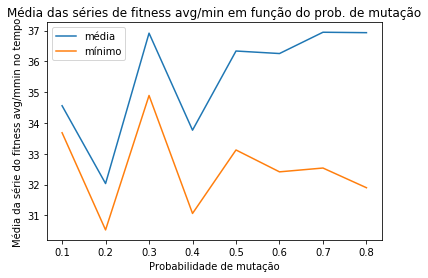

In [79]:
colnames = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
log_avg_df.columns = colnames
log_min_df.columns = colnames

fig, ax = plt.subplots()
log_avg_df.mean().plot(kind='line', ax=ax)
log_min_df.mean().plot(kind='line', ax=ax)
ax.legend(["média", "mínimo"]);
plt.title('Média das séries de fitness avg/min em função do prob. de mutação')
plt.xlabel("Probabilidade de mutação")
plt.ylabel("Média da série do fitness avg/min")

In [80]:
# Variando a prob de crossover
dict_log_min = {}
dict_log_avg = {}
for prob in tqdm(np.arange(0.1, 0.9, 0.1)):    
    pop_loop, log_loop = main_func(N_, n, n_generations, numPontos, cx_prob=prob)
    dict_log_min[str(prob)] = (log_loop.select('min')) 
    dict_log_avg[str(prob)] = (log_loop.select('avg'))
log_avg_df = pd.DataFrame.from_dict(dict_log_avg)
log_min_df = pd.DataFrame.from_dict(dict_log_min)








  0%|                                                                                            | 0/8 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessTSP' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\ProgramData\Anaconda3\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)







 12%|██████████▍                                                                        | 1/8 [02:02<14:18, 122.60s/it]






 25%|████████████████████▊                                                              | 2/8 [04:08<12:21, 123.55s/it]






 38%|███████████████████████████████▏                                                   | 3/8 [06:18<10:27, 125.45s/it]






 50%|█

Text(0, 0.5, 'Média da série do fitness avg/min')

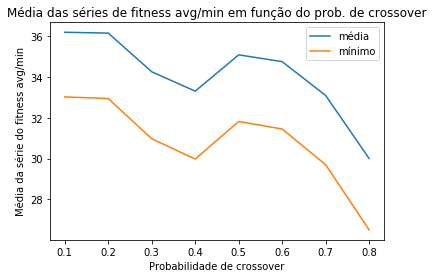

In [81]:
colnames = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
log_avg_df.columns = colnames
log_min_df.columns = colnames

fig, ax = plt.subplots()
log_avg_df.mean().plot(kind='line', ax=ax)
log_min_df.mean().plot(kind='line', ax=ax)
ax.legend(["média", "mínimo"]);
plt.title('Média das séries de fitness avg/min em função do prob. de crossover')
plt.xlabel("Probabilidade de crossover")
plt.ylabel("Média da série do fitness avg/min")

**(c)(3pts)** Crie uma função `avalia_percurso_com_restricao` baseada em `avalia_percurso`, que penalize cruzamentos em uma dada longitude ou latitude (vc escolhe). A imagem abaixo mostra um exemplo de restrição sobreposta a uma solução sem restrição.